# Rendimento de Parafusos

In [1]:
from sympy import *
import numpy as np
Mt, H, dm, F, tanp, gama, beta, betan, eta, N, P, Wf, Wu = symbols('M_t H d_m F tan_phi gamma \
beta beta_n eta N P W_f W_u')

O momento aplicado sobre um parafuso necessário para elevar uma carga $F$ é:

In [2]:
eq1 = Eq(Mt, H*dm/2)
display(eq1)

Eq(M_t, H*d_m/2)

A força $H$ necessária para vencer a força $F$, exterior ao parafuso é:

In [3]:
eq2 = Eq(H*cos(gama), F*sin(gama)+tanp*(F*cos(gama)+H*sin(gama)))
display(eq2)
res1 = simplify(solve(eq2,H)[0])
display(res1)

Eq(H*cos(gamma), F*sin(gamma) + tan_phi*(F*cos(gamma) + H*sin(gamma)))

F*(tan_phi*cos(gamma) + sin(gamma))/(-tan_phi*sin(gamma) + cos(gamma))

Substituíndo o valor de $H$ na equação, vem que:

In [4]:
eq1.subs(H,res1)

Eq(M_t, F*d_m*(tan_phi*cos(gamma) + sin(gamma))/(2*(-tan_phi*sin(gamma) + cos(gamma))))

A expressão anterior só é válida para a rosca quadrada ou assimétrica equivalente. No caso de a rosca ter flancos inclinados $\beta$, é necessário calcular a força normal à hélice no raio médio.
Considerando o ângulo de hélice $\gamma$, a relação entre o ângulo $\beta$ medido no plano axial e o ângulo $\beta_n$ medido num plano normal à hélice é:

In [5]:
eq3 = Eq(tan(betan),tan(beta)*cos(gama))
display(eq3)

Eq(tan(beta_n), cos(gamma)*tan(beta))

A força normal relevante para o cálculo da força de atrito é:

In [6]:
eq4 = Eq(N,F*cos(gama)/cos(betan)+H*sin(gama)/cos(betan))
display(eq4)
eq5 = Eq(H*cos(gama), F*sin(gama)+tanp*(eq4.rhs))
display(eq5)
res2 = simplify(solve(eq5,H)[0])
display(res2)

Eq(N, F*cos(gamma)/cos(beta_n) + H*sin(gamma)/cos(beta_n))

Eq(H*cos(gamma), F*sin(gamma) + tan_phi*(F*cos(gamma)/cos(beta_n) + H*sin(gamma)/cos(beta_n)))

F*(tan_phi*cos(gamma) + sin(gamma)*cos(beta_n))/(-tan_phi*sin(gamma) + cos(beta_n)*cos(gamma))

E o momento aplicado neste caso é:

In [7]:
eqmt = eq1.subs(H,res2)
display(eqmt)

Eq(M_t, F*d_m*(tan_phi*cos(gamma) + sin(gamma)*cos(beta_n))/(2*(-tan_phi*sin(gamma) + cos(beta_n)*cos(gamma))))

Planificando a hélice, vem que:

In [8]:
eq6 = Eq(tan(gama),P/(2*pi*dm/2))
display(eq6)
res3 = solve(eq6,P)[0]

Eq(tan(gamma), P/(pi*d_m))

O rendimento de um parafuso é dado pela relação entre o trabalho fornecido e o trabalho útil realizado. O trabalho fornecido durante uma rotação é:

In [9]:
eq7 = Eq(Wf,Mt*2*pi)
display(eq7)

Eq(W_f, 2*pi*M_t)

O trabalho útil é:

In [10]:
eq8 = Eq(Wu,F*P)
display(eq8)

Eq(W_u, F*P)

In [11]:
eqe = Eq(eta, Wu/Wf)
display(eqe)

Eq(eta, W_u/W_f)

In [12]:
eqe2 = eqe.subs(Wu,eq8.rhs).subs(Wf,eq7.rhs)
display(eqe2)

Eq(eta, F*P/(2*pi*M_t))

In [13]:
expr = simplify(eqe2.subs(Mt,eqmt.rhs).subs(P,res3))
display(expr)

Eq(eta, (-tan_phi*sin(gamma) + cos(beta_n)*cos(gamma))*tan(gamma)/(tan_phi*cos(gamma) + sin(gamma)*cos(beta_n)))

In [14]:
Pa = 1.5
D = 10
di = 8.16 
rm = (D+di)/2
gam = np.arctan(Pa/(2*np.pi*rm))
val = expr.subs(gama,gam)
fun = lambdify([betan, tanp], val.rhs)

In [15]:
size = 100
ba = np.linspace(0,30,size)
bn = np.arctan(np.tan(ba*np.pi/180)*np.cos(gam))
tp = np.linspace(0.0,0.2,size) 
bplot = np.outer(bn,np.ones(size)).T
tplot = np.outer(tp,np.ones(size))
zplot = fun(bplot,tplot)

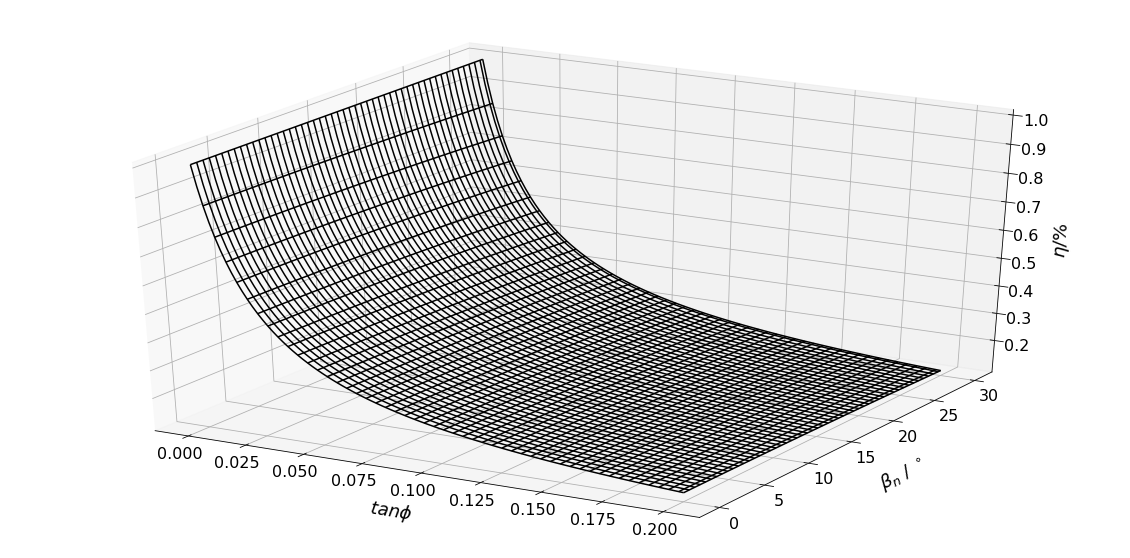

In [18]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.plot_wireframe(tplot, bplot*180/np.pi, zplot, color='black')
#ax.plot3D(tplot, bplot, zplot, 'gray')
#ax = plt.axes(projection='3d')
ax.set_ylabel(r'$\beta_n$ / $^\circ$', fontsize=18,labelpad=20)
ax.set_xlabel(r'$tan \phi$', fontsize=18,labelpad=20)
ax.set_zlabel(r'$\eta / \%$', fontsize=18,labelpad=10)
ax.set_facecolor('w')
plt.tick_params(axis='both', which='major', labelsize=16)
#ax.view_init(30, 65)